In [98]:
import sys

sys.path.insert(0, '../')
import utils.common as cm
import utils.bootcampviztools as viz

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.model_selection import train_test_split

In [99]:
df = pd.read_csv(cm.DATA_PATH)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   vehicle_type            100000 non-null  object 
 1   make                    100000 non-null  object 
 2   model                   100000 non-null  object 
 3   version                 99842 non-null   object 
 4   fuel                    96810 non-null   object 
 5   year                    100000 non-null  int64  
 6   kms                     99189 non-null   float64
 7   power                   99709 non-null   float64
 8   doors                   0 non-null       float64
 9   shift                   98982 non-null   object 
 10  color                   0 non-null       float64
 11  photos                  100000 non-null  int64  
 12  description             55810 non-null   object 
 13  price                   100000 non-null  int64  
 14  currency             

## Descripción de las variables
<table>
<tr>
    <th>Nombre de columna</th>
    <th>Tipo de variable</th>
    <th>Descripción</th>
    <th>Comentarios</th>
</tr>
<tr>
    <td>vehicle_type</td>
    <td>Categórica</td>
    <td>Tipo de vehículo</td>
    <td>Todos los vehículos son coches (columna para eliminar)</td>
</tr>
<tr>
    <td>make</td>
    <td>Categórica</td>
    <td>Marca del vehículo</td>
    <td></td>
</tr>
<tr>
    <td>model</td>
    <td>Categórica</td>
    <td>Modelo del vehículo</td>
    <td>Habrá que ver si los nombres están bien escritos o hay valores repetidos</td>
</tr>
<tr>
    <td>version</td>
    <td>Texto/categórica</td>
    <td>Versión del modelo concreto de coche</td>
    <td>Habrá que valorar si se puede sacar información interesante de esa columna</td>
</tr>
<tr>
    <td>fuel</td>
    <td>Categórica</td>
    <td>Tipo de combustible que usa el vehículo</td>
    <td></td>
</tr>
<tr>
    <td>year</td>
    <td>Numérica</td>
    <td>Año al que pertenece el vehículo (fabricación)</td>
    <td></td>
</tr>
<tr>
    <td>kms</td>
    <td>Numérica</td>
    <td>Kilometraje realizado por el vehículo</td>
    <td></td>
</tr>
<tr>
    <td>power</td>
    <td>Numérica</td>
    <td>Potencia en caballos que tiene el coche</td>
    <td></td>
</tr>
<tr>
    <td>doors</td>
    <td>Numérica</td>
    <td>Número de puertas</td>
    <td>Tiene un 100% de missings, en principio se eliminará (a no ser que en otra columna encontremos el número de puertas)</td>
</tr>
<tr>
    <td>shift</td>
    <td>Binaria</td>
    <td>Tipo de cambio</td>
    <td>Manual; Automatic</td>
</tr>
<tr>
    <td>color</td>
    <td>Numérica</td>
    <td>Color del coche</td>
    <td>Tiene un 100% de missings, en principio se eliminará esta columna</td>
</tr>
<tr>
    <td>photos</td>
    <td>Numérica</td>
    <td>Número de fotos subidas al anuncio del coche</td>
    <td></td>
</tr>
<tr>
    <td>description</td>
    <td>Texto</td>
    <td>Anuncio del coche</td>
    <td>Probablemente eliminemos esta columna (44% de missings)</td>
</tr>
<tr>
    <td>price</td>
    <td>Numérica</td>
    <td>Precio del coche</td>
    <td>Esta columna será nuestro TARGET</td>
</tr>
<tr>
    <td>currency</td>
    <td>Categórica</td>
    <td>Tipo de moneda en la que se encuentra el precio</td>
    <td>Columna a eliminar, ya que tiene un único valor: €</td>
</tr>
<tr>
    <td>location</td>
    <td>Categórica</td>
    <td>Población en la que se vende el vehículo</td>
    <td>Valoraremos si utilizarla o no (tenemos código postal)</td>
</tr>
<tr>
    <td>publish_date</td>
    <td>Datetime</td>
    <td>Fecha de publicación del anuncio</td>
    <td></td>
</tr>
<tr>
    <td>update_date</td>
    <td>Datetime</td>
    <td>Fecha de actualización del anuncio</td>
    <td></td>
</tr>
<tr>
    <td>dealer_name</td>
    <td>Texto</td>
    <td>Nombre del vendedor particular o empresa</td>
    <td></td>
</tr>
<tr>
    <td>dealer_description</td>
    <td>Texto</td>
    <td>Descripción de la empresa de venta</td>
    <td>Probablemente eliminemos esta columna</td>
</tr>
<tr>
    <td>dealer_address</td>
    <td>Texto</td>
    <td>Dirección donde se encuentra la empresa que vende el vehículo</td>
    <td>Probablemente eliminemos esta columna</td>
</tr>
<tr>
    <td>dealer_zip_code</td>
    <td>Numérica</td>
    <td>Código postal del vendedor</td>
    <td></td>
</tr>
<tr>
    <td>dealer_city</td>
    <td>Texto</td>
    <td>Ciudad en la que se encuentra el vendedor</td>
    <td></td>
</tr>
<tr>
    <td>dealer_country_code</td>
    <td>Categórica</td>
    <td>Código escrito del nombre del país</td>
    <td>Esta columna tiene un único valor, la eliminaremos</td>
</tr>
<tr>
    <td>dealer_is_professional</td>
    <td>Binaria</td>
    <td>Indica si el vendedor es una empresa profesional que se dedica a ello o un particular</td>
    <td>Eliminaremos esta columna, ya que tiene un valor único: True</td>
</tr>
<tr>
    <td>dealer_website</td>
    <td>Texto</td>
    <td>Link a la página web de la empresa que vende el vehículo</td>
    <td>Esta columna la eliminaremos</td>
</tr>
<tr>
    <td>dealer_registered_at</td>
    <td>Datetime</td>
    <td>Fecha en la que el vendedor se registró en la plataforma</td>
    <td>Probablemente eliminaremos esta columna</td>
</tr>
<tr>
    <td>date</td>
    <td>Datetime</td>
    <td>Fecha en la que se extrajo la información</td>
    <td>Valoraremos si eliminar esta columna o solo utilizar una fecha concreta</td>
</tr>
</table>

In [101]:
total_cols = list(df.columns)

In [102]:
cm.data_report(df)

,DATA_TYPE,MISSINGS (%),UNIQUE_VALUES,CARDIN (%)
COL_N,,,,
vehicle_type,object,0.00,1,0.00
make,object,0.00,66,0.07
model,object,0.00,748,0.75
version,object,0.16,8658,8.66
fuel,object,3.19,4,0.00
year,int64,0.00,43,0.04
kms,float64,0.81,6643,6.64
power,float64,0.29,349,0.35
doors,float64,100.00,0,0.00


In [103]:
df.sample(5)

,vehicle_type,make,model,version,fuel,year,kms,power,doors,shift,...,dealer_name,dealer_description,dealer_address,dealer_zip_code,dealer_city,dealer_country_code,dealer_is_professional,dealer_website,dealer_registered_at,date
32838,car,Suzuki,Baleno,1.2 GL,Gasolina,2017,104380.0,90.0,NaN,manual,...,AUTOHERO BARCELONA ..,Concesionario con proceso de compra online con...,"6, Plaça de Tetuan, la Dreta de l'Eixample, Ei...",8007.0,Barcelona,ES,True,https://www.autohero.com/es/,2019-05-17,2023-01-26
10496,car,Audi,S3,Sportback 2.0 TFSI 300 quattro 5p S tronic,Gasolina,2015,119000.0,300.0,NaN,automatic,...,JP Good cars C.,NaN,"Calle de la Ribera Alta, l'Alcúdia de Crespins...",46690.0,L' Alcudia de Crespins,ES,True,NaN,2018-10-14,2023-01-30
17343,car,Dacia,Logan,Essential TCE 66 kW (90 CV) GLP,Otros,2019,38463.0,90.0,NaN,manual,...,OCASIONPLUS M.,En OcasionPlus Marbella podrás comprar un coch...,"Las Gitanillas, Calle Málaga, Barriada Blas In...",29680.0,Estepona,ES,True,www.ocasionplus.com,2021-04-19,2023-02-06
94866,car,Citroen,Berlingo,Talla M BlueHDi 100 S&S FEEL PACK,Diésel,2021,27800.0,102.0,NaN,manual,...,Flexicar F.,"Para Comprar o Vender tu coche, Primero en FLE...","Centro - El Arroyo - La Fuente, Fuenlabrada, Á...",28947.0,Fuenlabrada,ES,True,www.flexicar.es,2021-05-10,2023-02-06
10729,car,Bentley,Arnage,6.8 V8 405cv Auto 4p,Gasolina,2003,87700.0,405.0,NaN,manual,...,Autofesa ..,El mayor macrocentro de compra venta de coches...,"Condado de Treviño 9, 9, Calle del Condado de ...",28046.0,Madrid,ES,True,NaN,2016-11-22,2023-01-25


#### Creamos una copia de seguridad

In [104]:
df_copy = df.copy()

## División en train y test

In [105]:
train, test = train_test_split(df, test_size = 0.2, random_state = 42)

In [106]:
print('Las dimensiones de train son:', train.shape)
print('Las dimensiones de test son:', test.shape)

Las dimensiones de train son: (80000, 28)
Las dimensiones de test son: (20000, 28)


## Análisis del target

In [107]:
target = 'price'

(2,)


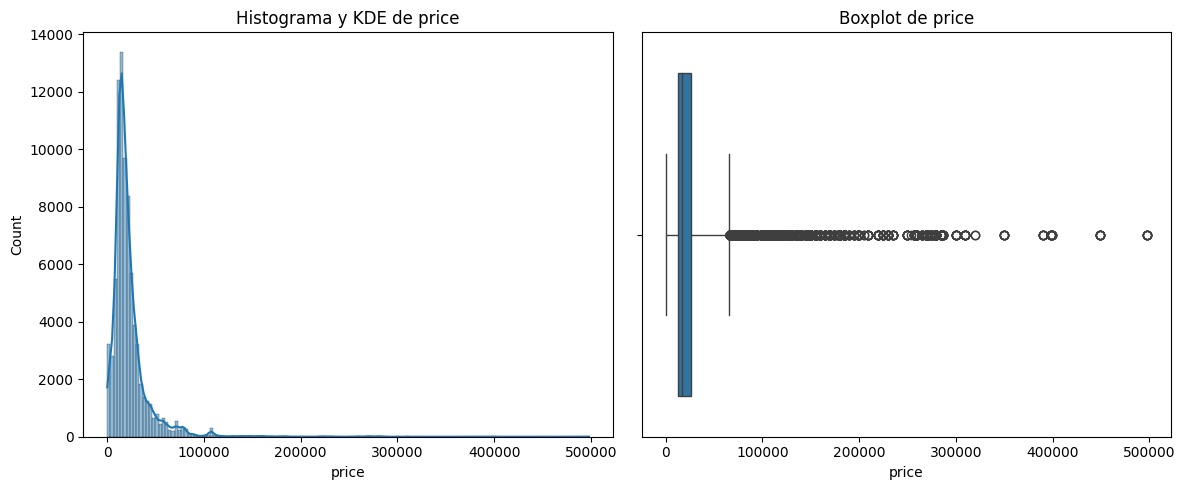

In [108]:
viz.plot_distribution_combined_graphs(train, [target], whisker_width = 3, bins = 150)

In [109]:
train[target].describe()

count     80000.000000
mean      22844.601438
std       23158.585868
min           0.000000
25%       12490.000000
50%       17450.000000
75%       25875.000000
max      498000.000000
Name: price, dtype: float64

Se puede apreciar que el target tiene una distribución en larga cola, lo cual tendremos que tener en cuenta a la hora de modelar. También encontramos grandes outliers, que veremos qué hacer con ellos.

Nos llama la atención que hay coches que tienen un precio de 0, lo cual es un error o un anuncio falso. Por ello, procedemos a eliminar todas las filas que tengan un precio menor de 100€.

In [110]:
train.drop(index = (train.loc[train[target] < 100].index), inplace = True)

Vamos a ver cómo cambia la distribución del target al aplicar alguna transformación, vamos a intentar que su distribución sea lo más normal posible.

Con una transformación logarítmica:


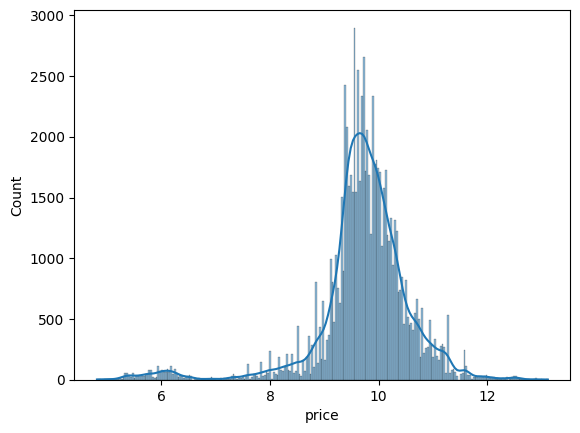

In [111]:
print('Con una transformación logarítmica:')
sns.histplot(np.log(train[target]), kde = True);

Aplicando box-cox:


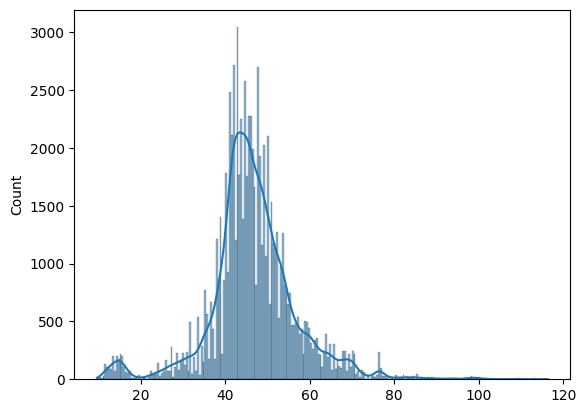

In [112]:
print('Aplicando box-cox:')
sns.histplot(stats.boxcox(train[target])[0], kde = True);

Ambas transformaciones acercan el target a la normalidad, pero vamos a utilizar un Q-Q plot para ver qué transformación nos conviene más.

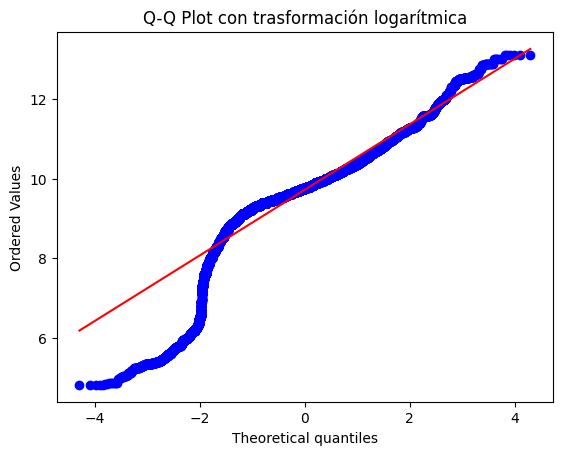

In [113]:
stats.probplot(np.log(train[target]), dist = "norm", plot = plt)
plt.title('Q-Q Plot con trasformación logarítmica')
plt.show();

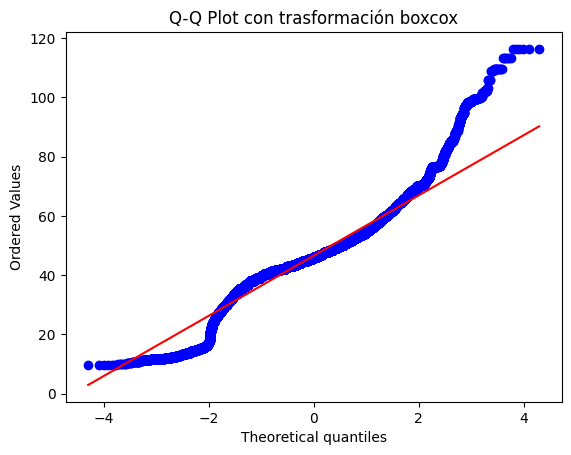

In [114]:
stats.probplot(stats.boxcox(train[target])[0], dist = "norm", plot = plt)
plt.title('Q-Q Plot con trasformación boxcox')
plt.show();

La transformación logarítmica hace que la distribución se desvíe en valores bajos, mientras que la boxcox lo hace con valores muy altos. Parece que la boxcos normaliza mejor en valores intermedios, por lo que es muy probable que utilicemos esa transformación.

## Preselección de variables

Vamos a eliminar aquellas variables cuyo % de nulos es muy alto y aquellas que hemos seleccionado al ver su descripción.

In [115]:
cols_to_drop = ['doors', 'color', 'description', 'vehicle_type', 'currency', 'dealer_name', 'dealer_description', \
                'dealer_address', 'dealer_city', 'dealer_country_code', 'dealer_is_professional', 'dealer_website', \
                'dealer_registered_at', 'date', 'publish_date', 'update_date']

In [116]:
train.drop(columns = cols_to_drop, inplace = True)

In [117]:
print(f'Ahora tenemos {len(train.columns)} columnas')

Ahora tenemos 12 columnas


Como el dataset proviene de anuncios en diferentes aplicaciones, tenemos muchos duplicados en los que solo cambia la fecha de actualización, que ahora hemos eliminado. Por ello, vamos a limpiar ahora los duplicados.

In [118]:
print(f'El número de instancias originales es: {train.shape[0]}\n\
El número de instancias sin duplicar es: {train.drop_duplicates().shape[0]}')

El número de instancias originales es: 79965
El número de instancias sin duplicar es: 38533


In [143]:
train.drop_duplicates(inplace = True)

## Análisis exploratorio de los datos: univariante

### Variables numéricas

In [140]:
num_cols = []
for col in train.columns:
    if col == 'price':
        pass
    elif train[col].dtype == 'int' or train[col].dtype == 'float':
        num_cols.append(col)
    
print('Las variables numéricas son:', num_cols)

Las variables numéricas son: ['year', 'kms', 'power', 'photos', 'dealer_zip_code']


(5, 2)


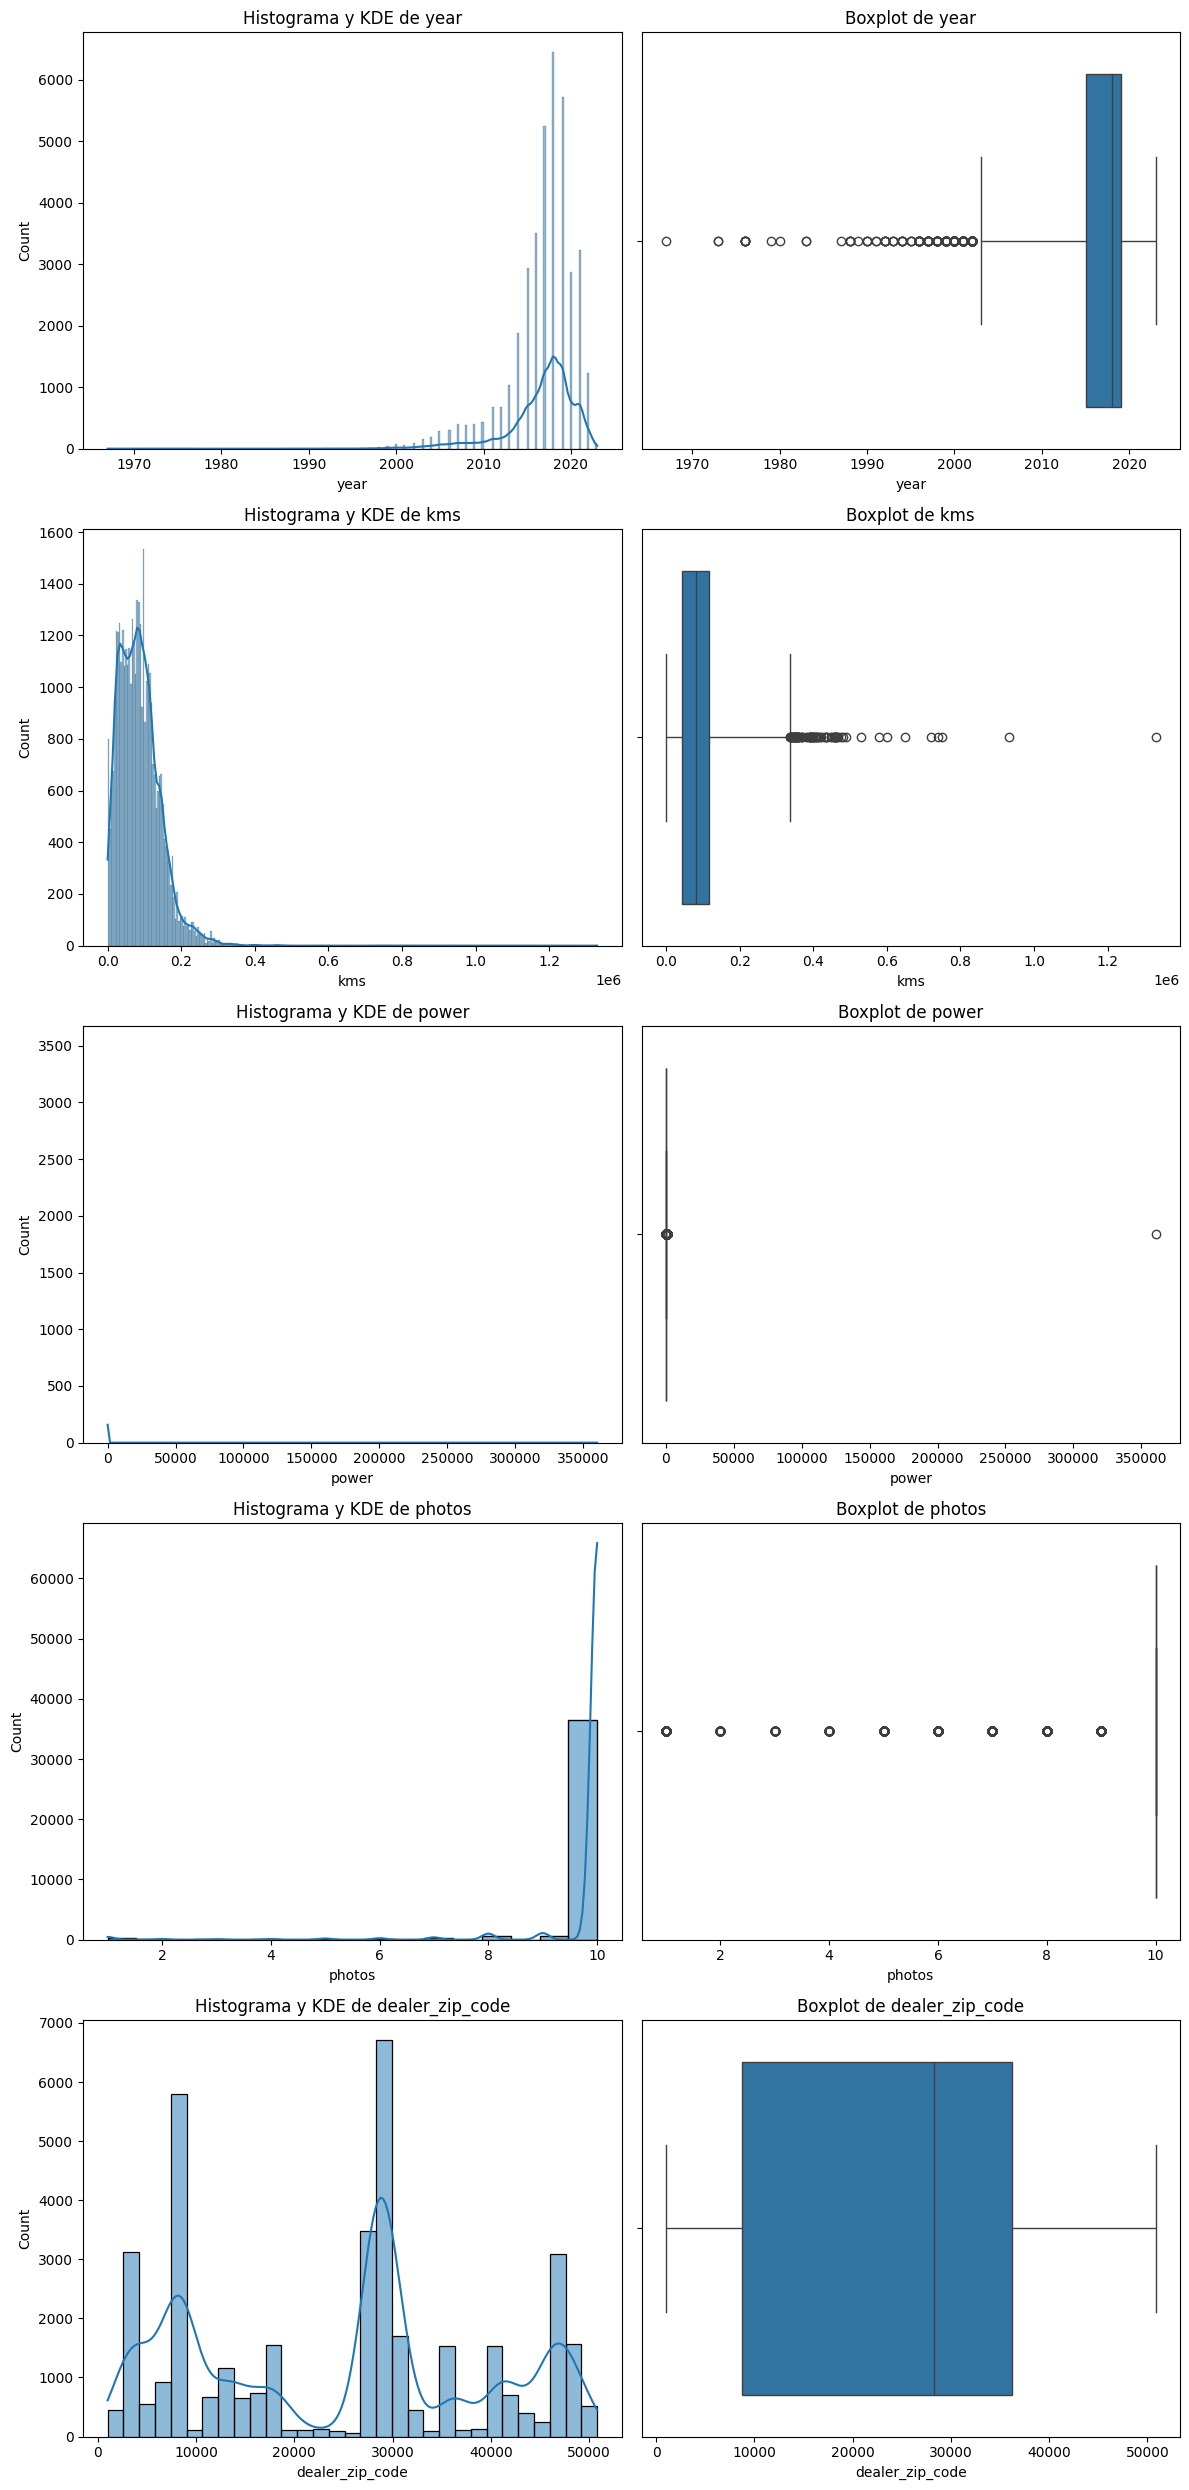

In [148]:
viz.plot_distribution_combined_graphs(train, num_cols, whisker_width = 3)

Analizando los histogramas de cada variable numérica, podemos observar lo siguiente:
- year: se puede observar que la mayor parte de los vehículos son posteriores al año 2000, su distribución es asimétrica, por lo que intentaremos normalizarla.
- kms: distribución asimétrica, la mayor parte de los valores se encuentran entre 0 y 250000 km, intentaremos normalizar.
- power: se observan valores muy altos para ser la potencia real de un vehículo, por lo que hay errores. Estudiaremos con mayor detenimiento esta columna.
- photos: casi todos los anuncios tienen entre 7 y 10 fotos, será interesante normalizar.
- dealer_zip_code: el código postal se reparte algo más por todo el rango de valores, pero veremos qué tal le sienta la normalización.

In [146]:
train[num_cols].describe()

,year,kms,power,photos,dealer_zip_code
count,38533.000000,3.830300e+04,38456.000000,38533.000000,38506.000000
mean,2016.664755,8.645388e+04,153.651186,9.825734,24522.403418
std,4.033325,5.633881e+04,1839.551945,0.967697,14612.779195
min,1967.000000,0.000000e+00,0.000000,1.000000,1002.000000
25%,2015.000000,4.370000e+04,102.000000,10.000000,8734.000000
50%,2018.000000,8.070100e+04,128.000000,10.000000,28230.000000
75%,2019.000000,1.169610e+05,150.000000,10.000000,36211.000000
max,2023.000000,1.330000e+06,360571.000000,10.000000,50820.000000


#### Power

In [162]:
train.loc[train.power < train.power.max(), 'power'].max()

np.float64(999.0)

In [165]:
train.loc[train.power > 800]

,make,model,version,fuel,year,kms,power,shift,photos,price,location,dealer_zip_code
48800,Audi,S8,4.0 TFSI 571 quattro 4p tip.,Gasolina,2000,250000.0,360571.0,automatic,9,6000,Albacete,2007.0
38750,Dodge,Viper,SRT DEMON,Gasolina,2008,8700.0,850.0,automatic,8,199000,Alcalá de Henares,28803.0
44161,Ferrari,LaFerrari,6.3 963 3p,NaN,2017,20000.0,963.0,manual,5,1000,Fuente el Saz de Jarama,28140.0
11228,Dodge,Viper,SRT-10 503 2p,Gasolina,2008,3000.0,850.0,manual,10,279000,Alcalá de Henares,28803.0
40472,Tesla,Model S,Plaid 1020 100kWh Tracción Intregal 5p Aut.,Eléctrico,2023,3046.0,999.0,automatic,10,149990,Madrid,28046.0
40435,Tesla,Model X,Performance Ludicrous 680 5p Aut.,Eléctrico,2019,88900.0,816.0,automatic,10,79880,Valencia,46001.0
40434,Tesla,Model X,Performance Ludicrous 680 5p Aut.,Eléctrico,2019,88900.0,816.0,automatic,10,79900,Valencia,46001.0
21314,Tesla,Model S,Performance Ludicrous 613 5p Aut.,Eléctrico,2019,45920.0,816.0,automatic,10,78500,Valencia,46001.0


Vemos que el coche con 360571 caballos es un error, ya que no existe un vehículo con esa potencia. El resto sin embargo sí son correctos, por lo que solo vamos a eliminar aquellos anuncios con una potencia superior a los 1020 caballos, ya que hay un modelo de Tesla en el mercado que llega a esa potencia.

In [172]:
train.drop(train.loc[train.power > 1020].index, inplace = True)